# explain on register 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("Iris.csv")
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
data.drop(columns="Species",inplace=True) # we del the output to understand k_means 

In [4]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2


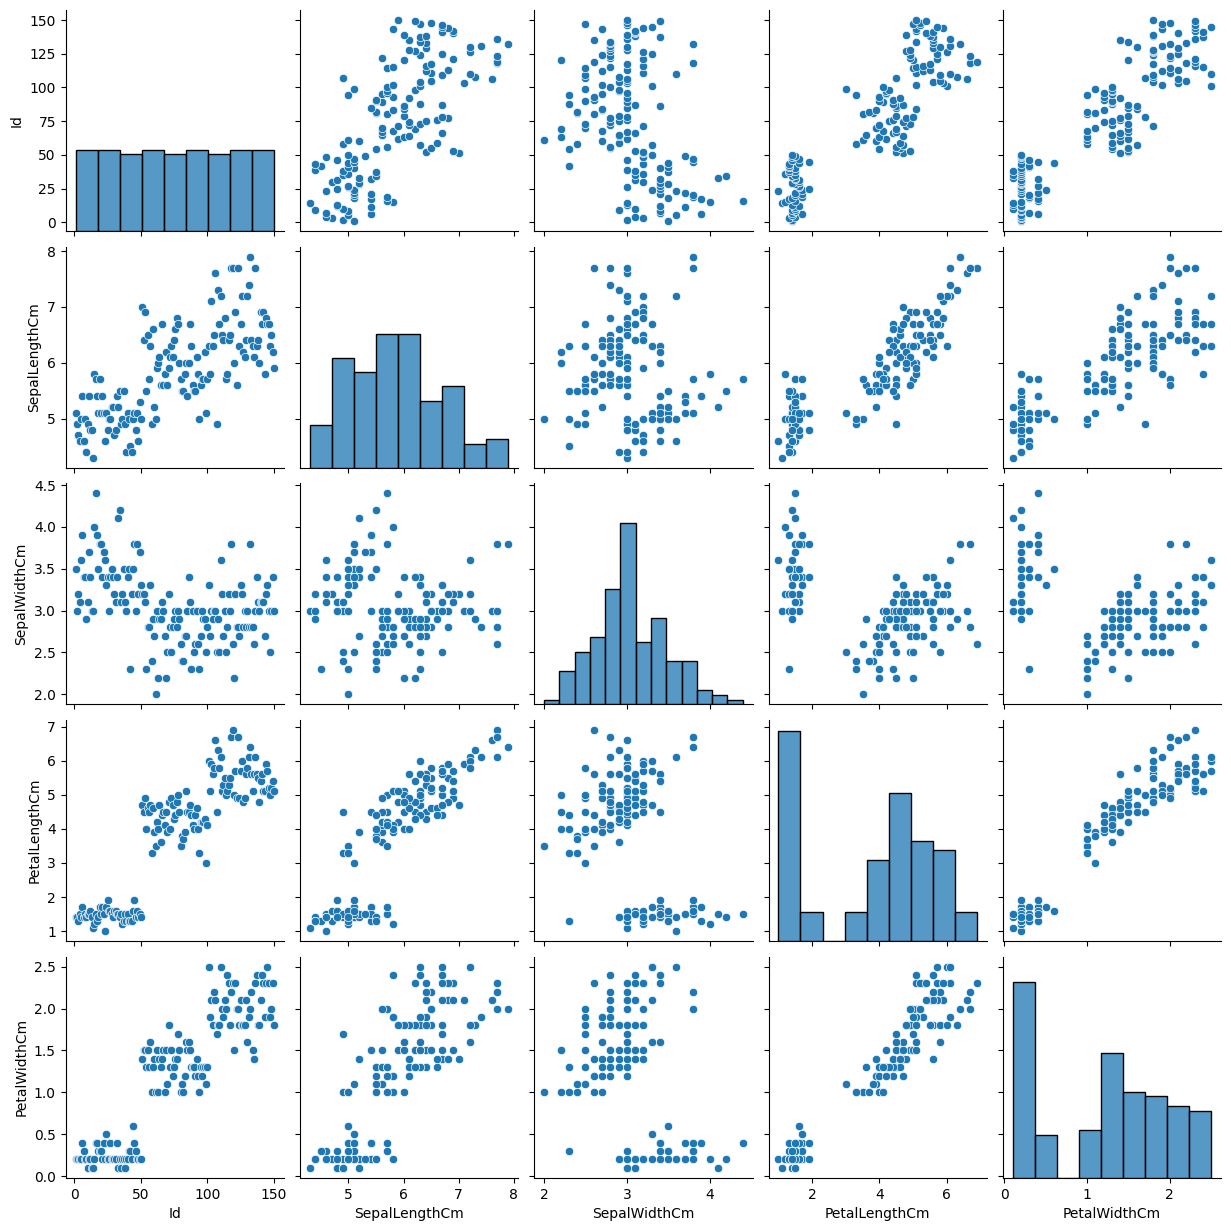

In [5]:
# to check our data is linear or not 
sns.pairplot(data=data)
plt.show()

# k_mean_clustering 

In [28]:
from sklearn.cluster import KMeans

In [29]:
# now we dont know how many clusters are present so we create a loop to 20 
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++') # on rgegister kmean++
    km.fit(data)
    # km.inertia_   inertia is use to get the value of wcss 
    wcss.append(km.inertia_)

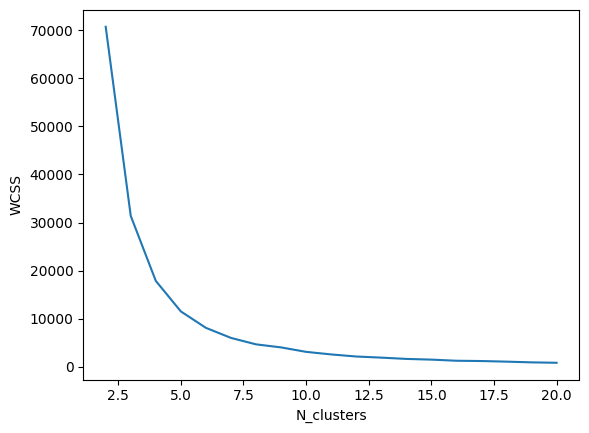

In [30]:
plt.plot([i for i in range(2,21)],wcss) # we created a loop intead no of clusters bcz we dont know the acutal clusters 
plt.xlabel("N_clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
# now the acutaul data is not shown in n_clusters mean we have to clear out the x _llabel label

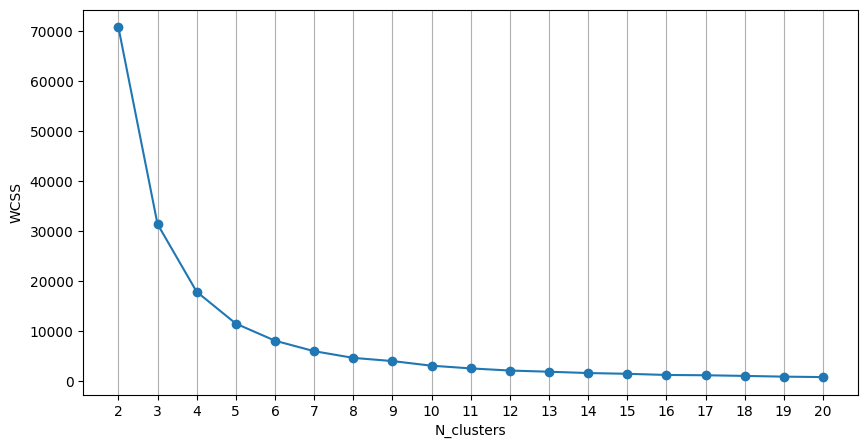

In [32]:
plt.figure(figsize=[10,5])
plt.plot([i for i in range(2,21)],wcss,marker = "o") 
# we created a loop intead no of clusters bcz we dont know the acutal clusters marker is used for dots
plt.xlabel("N_clusters")
plt.xticks([i for i in range(2,21)])  # mean we have to clear out the x_label
plt.ylabel("WCSS")
plt.grid(axis="x") # create straight lines
plt.show()

In [33]:
# now we create 3 clusters according to elbow point grph above 
kmm = KMeans(n_clusters = 3) # 3 BCZ WE NOW THERE ARE 3 CLUSTERS IN OUR DATA SET 
kmm.fit_predict(data)# now fit predict the dataset to our model 
predict = kmm.fit_predict(data) 
# now we create new column with name predict and store our predicted value in it 
# kmm.labels_ # this will help us in the end to check weather our output is correct or not 

In [34]:
data["predict"] = predict

In [35]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0
146,147,6.3,2.5,5.0,1.9,0
147,148,6.5,3.0,5.2,2.0,0
148,149,6.2,3.4,5.4,2.3,0


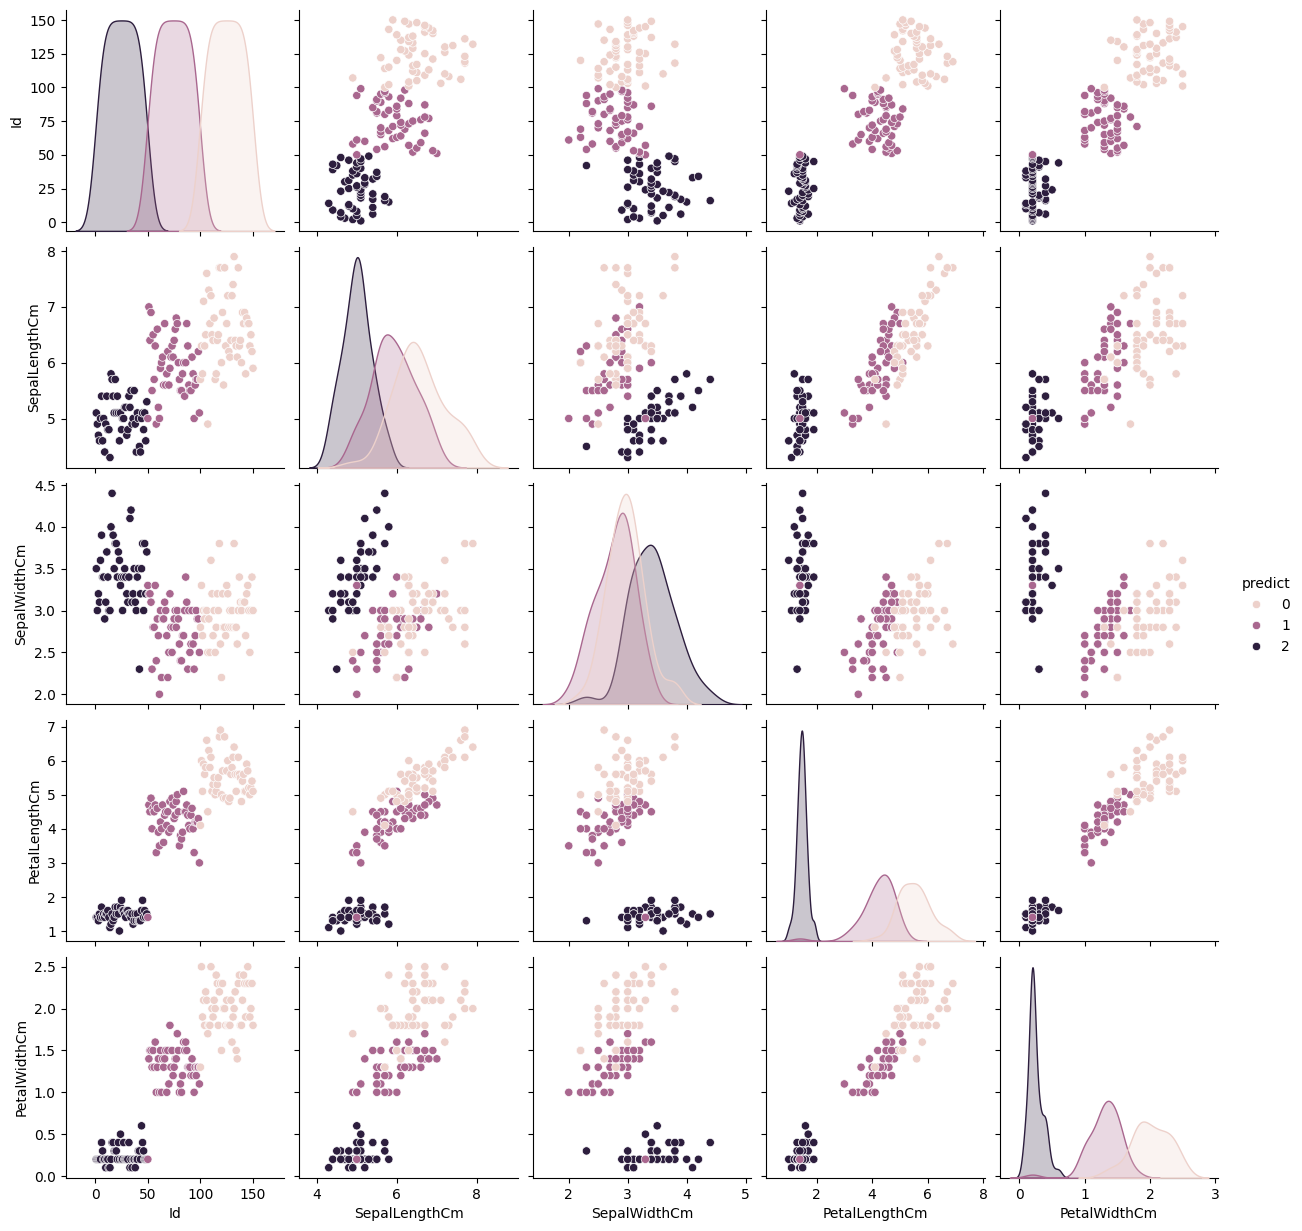

In [36]:
# now see how the clusters are define 
sns.pairplot(data=data,hue = "predict")
plt.savefig("predict.jpg")
plt.show() # we can see thre clusters are created 

In [37]:
# now check how the orignal data create clusters 
org_data = pd.read_csv("Iris.csv")
org_data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


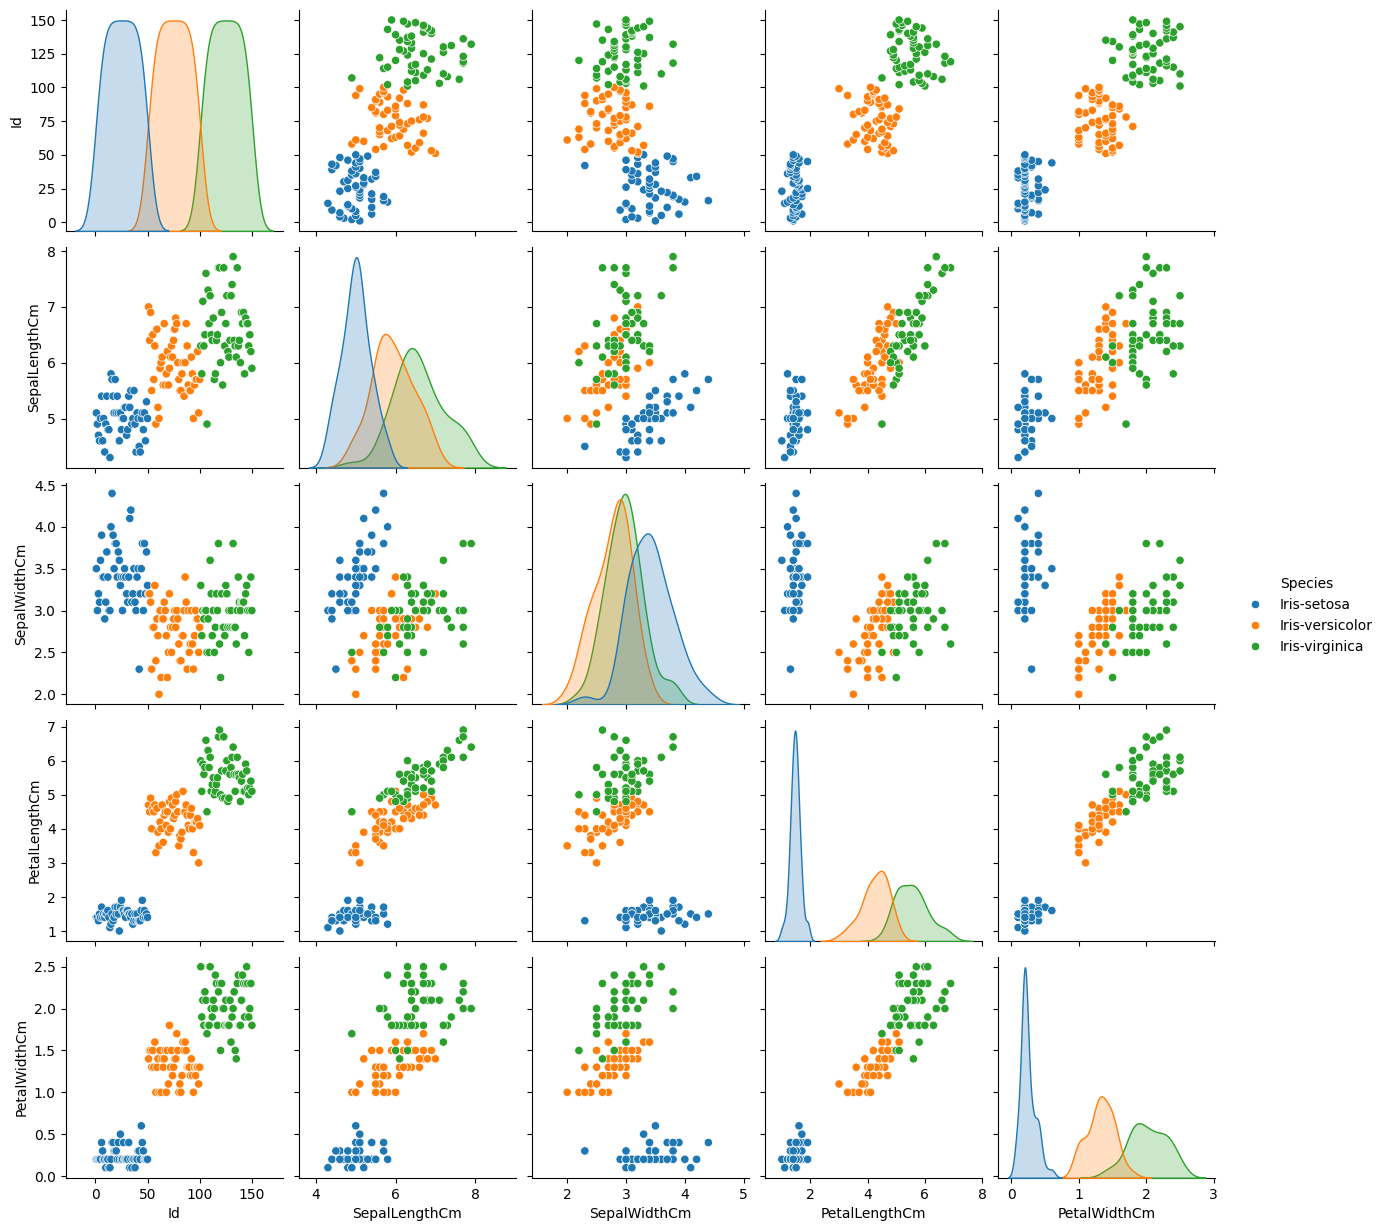

In [38]:
sns.pairplot(data=org_data,hue = "Species")
plt.savefig("orginal.jpg")
plt.show()

In [39]:
# now we save both the grph and compare side by side 

In [40]:
# now check weather we find the exact clusters or not this is done through 

# Silhoutte score pg44

In [41]:
kmm.labels_ # explain above 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(data,labels=kmm.labels_)

np.float64(0.5819032623764595)

In [49]:
# ans is close to 1 but we want more accurate results so we create a for loop 
ss = [] # create variable where i want to store my result 
no_clusters = [j for j in range(2,21)] # we create a list of number of clusters to create a graph 
for i in range(2,21):
    kn1 = KMeans(n_clusters =i)
    kn1.fit(data)
    ss.append(silhouette_score(data,kn1.labels_)) 

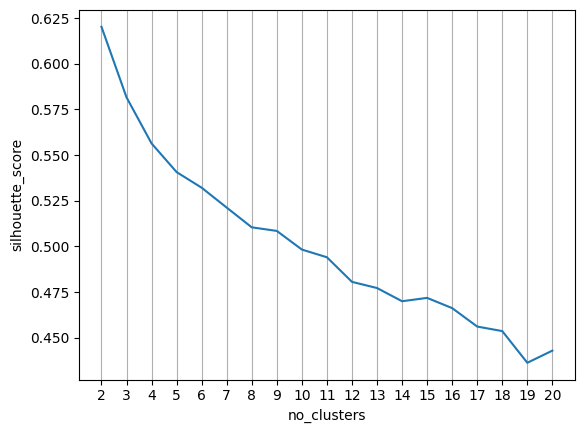

In [53]:
# now ss vs no of cluster graph 
plt.plot(no_clusters,ss)
plt.xlabel("no_clusters")
plt.ylabel("silhouette_score")
plt.xticks([i for i in range(2,21)])
plt.grid(axis="x")
plt.show()

In [ ]:
# according to it max clusters are 2 which is quite correct 